In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('card0.csv', skiprows=6)

In [28]:
import matplotlib.pyplot as plt

In [29]:
columns = df.columns
print(columns)

Index(['time unit: ps',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|nfca_rx_dsp:u_nfca_rx_dsp|rx_ask',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|nfca_rx_dsp:u_nfca_rx_dsp|rx_ask_en',
       ' carrier_out', ' uart_rx', ' uart_tx',
       ' uart2nfca_system_top:u_uart2nfca_system|uart_rx:u_uart_rx|ClockGenerationAndRecovery_1fe83d3abd0:i_clk|rx_sample',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|adc_data',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|adc_data[11]',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|adc_data[10]',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|adc_data[9]',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|adc_data[8]',
       ' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller

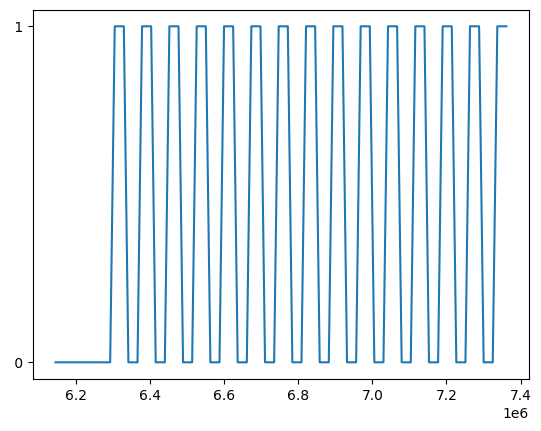

In [30]:
t = np.array(df['time unit: ps'])
c = np.array(df[' carrier_out'])

start = 500
end = start + 100
plt.plot(t[start:end], c[start:end])
#plt.plot( c[start:end])
plt.show()

In [31]:
raw_data = df[' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|nfca_rx_dsp:u_nfca_rx_dsp|rx_raw_data']
lpf_data = df[' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|nfca_rx_dsp:u_nfca_rx_dsp|rx_lpf_data']

def conv(s):
    try:
        v = int(s, 16)
    except:
        v = 0
    return v
    
iraw_data = [conv(x) for x in raw_data]
ilpf_data = [conv(x) for x in lpf_data]

rx = np.array(iraw_data, dtype=float)
lpf = np.array(ilpf_data, dtype=float)

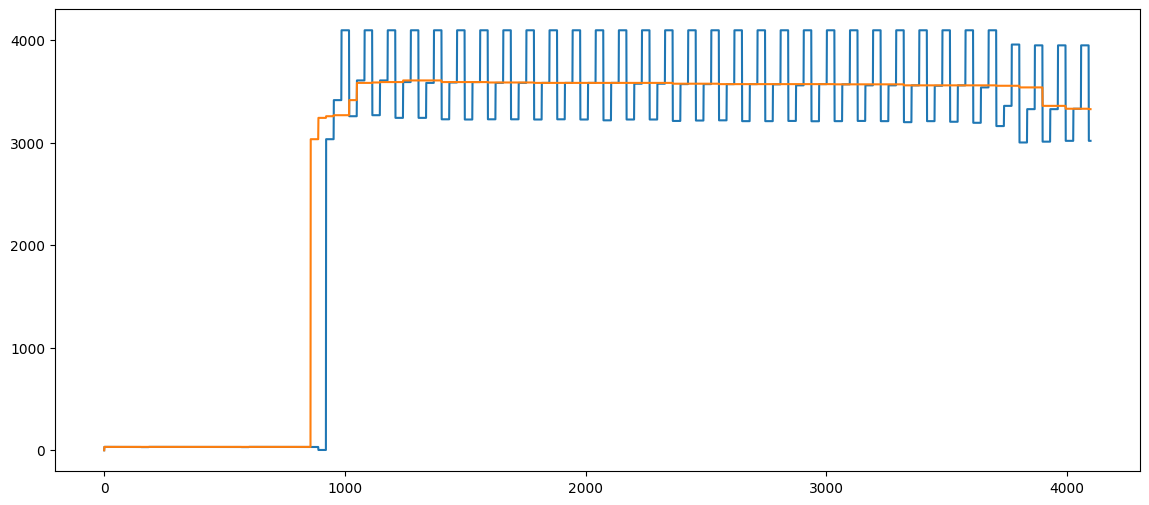

In [32]:
plt.figure(figsize=(14, 6))
plt.plot(rx)
plt.plot(lpf)
plt.show()

In [49]:
def get_response(f):
    df = pd.read_csv(f, skiprows=6)
    data = df[' uart2nfca_system_top:u_uart2nfca_system|nfca_controller:u_nfca_controller|nfca_rx_dsp:u_nfca_rx_dsp|rx_raw_data']
    idata = [conv(x) for x in data]
    rx = np.array(idata, dtype=float)
    return rx

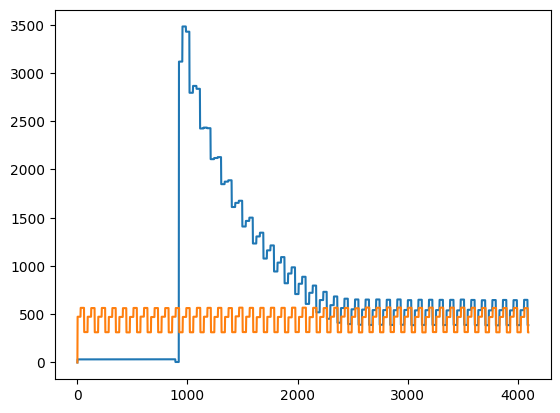

In [50]:
nocard0 = get_response('no_card0.csv')
nocard1 = get_response('no_card1.csv')


plt.plot(nocard0)
plt.plot(nocard1)
plt.show()

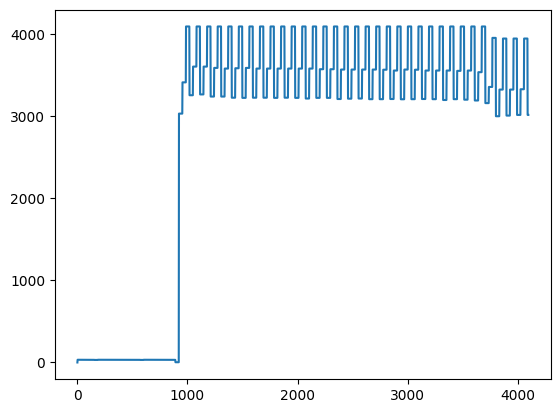

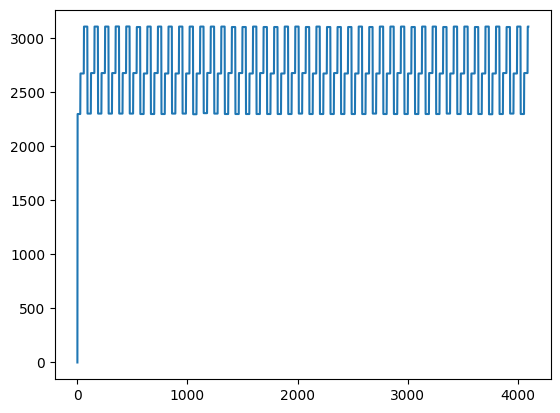

In [52]:
card0 = get_response('card0.csv')
card1 = get_response('card1.csv')


plt.plot(card0)
plt.show()

plt.plot(card1)
plt.show()